## Description
This is the cross correlation calculation result. The result should show below in the first graph (ignore the first 2). You might need to invoke the cell below here to see the graph.

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import analysis as an
import cross_correlation_analyzer as cca
import numpy as np
from scipy import signal
import pickle

plt.rc('figure', max_open_warning = 0)


Peaks: ['[221]=3.0e+10', '[715]=4.7e+08', '[1081]=5.1e+08', '[1526]=3.1e+08', '[2000]=3.7e+08']
Peaks: ['[221]=2.6e+10', '[727]=4.2e+08', '[1077]=2.0e+08', '[1494]=2.9e+08', '[2037]=2.7e+08']
Peaks: ['[221]=2.8e+10', '[726]=5.2e+08', '[1078]=3.0e+08', '[1498]=3.1e+08', '[2028]=3.4e+08']
Peaks: ['[221]=2.9e+10', '[730]=5.1e+08', '[1066]=2.8e+08', '[1415]=3.5e+08', '[2001]=3.0e+08']
Peaks: ['[221]=2.9e+10', '[731]=5.1e+08', '[1050]=3.1e+08', '[1402]=3.5e+08', '[1986]=3.3e+08']
Avg distance: 1.9620465668934244


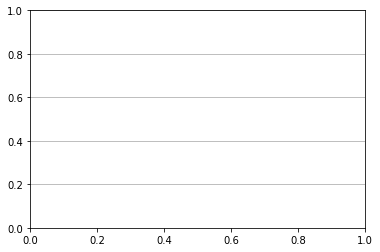

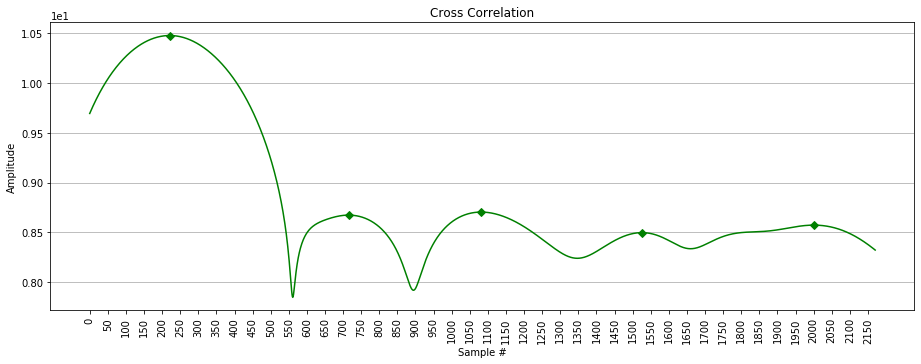

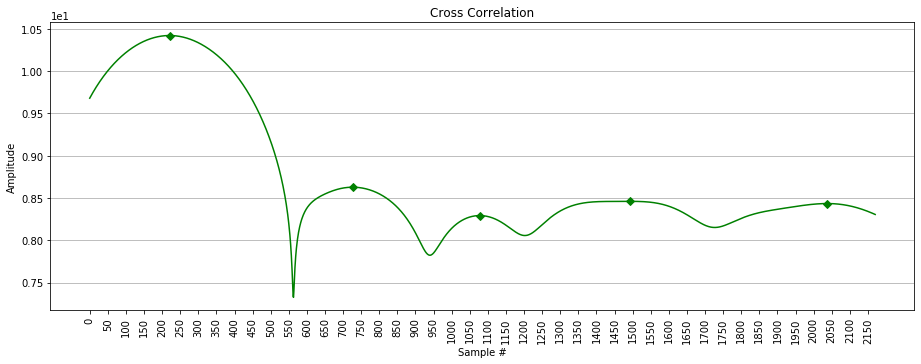

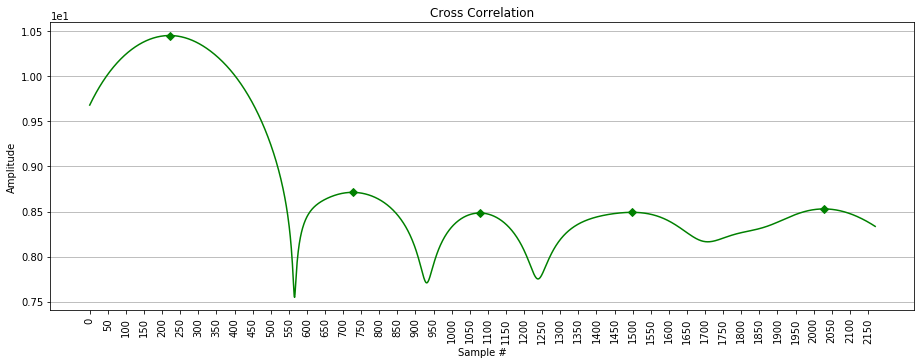

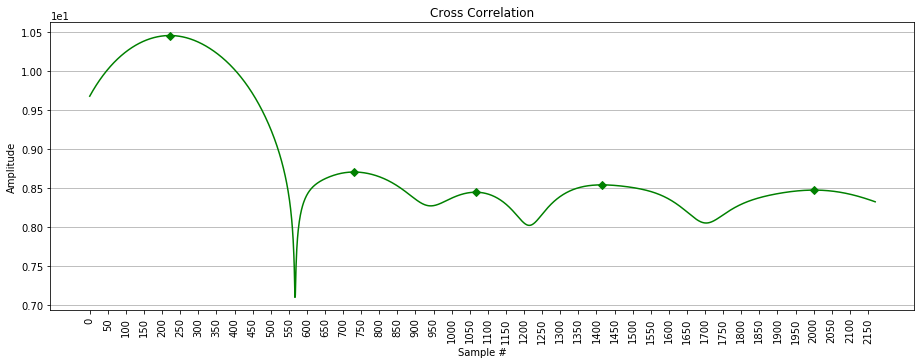

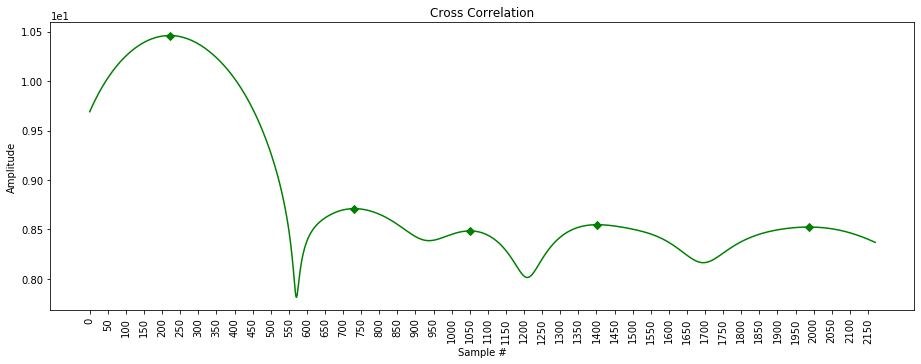

In [8]:
%matplotlib inline


an.PREFIX = 'galia.0.0m.'
threshold = 10.0 ** 0.85
frames_to_reach_phone_holder = 91
distance=int(an.CHIRP_DURATION * an.SAMPLE_RATE * 0.5 + frames_to_reach_phone_holder)
temp=19

distances = []
print_format = "Time {0}\nSpeed of Sound {1}\nDistance {2}"


for sample_number in range(1, 6):
    cc = cca.get_cc(sample_number)
    time_delta, speed_of_sound, half_distance, peaks = \
        cca.get_distances(cc, threshold, distance, temp)
    if half_distance:
        distances.append(half_distance)
    print("Peaks: {}".format(["[{0}]={1:.1e}".format(p,cc[p]) for p in peaks]))
#     print(print_format.format(time_delta, speed_of_sound, half_distance))
    logcc = [np.log10(c) for c in cc]
#     logcc = cc
    an.get_graph_figure(logcc, 'Cross Correlation', markers=peaks)
#     print("------")

print("Avg distance: {}".format(np.mean(distances)))